In [2]:
import torch
from torch import nn
from matplotlib import pyplot as plt
import numpy as np

In [1]:
#Weight and bias
weight = 0.6
bias = 0.4

In [3]:
#Preparing the data-set
X = torch.arange(0,1,0.03).unsqueeze(1)
X.shape

torch.Size([34, 1])

In [4]:
# Linear Regression Formula
y = X*weight + bias

In [6]:
y.shape

torch.Size([34, 1])

In [63]:
#Model Class
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weight = nn.Parameter(torch.rand(1,requires_grad=True,dtype = torch.float))
    self.bias = nn.Parameter(torch.rand(1,requires_grad=True,dtype = torch.float))

  # forward pass
  def forward(self, x:torch.Tensor)->torch.Tensor:
    return self.weight*x + self.bias

In [69]:
# Calling the class
torch.manual_seed(44)
lr = LinearRegressionModel()
lr.state_dict()

OrderedDict([('weight', tensor([0.7196])), ('bias', tensor([0.7307]))])

In [23]:
# Training and Testing Split
train = (int)(0.7*len(X))
train

23

In [24]:
X_train,y_train = X[:train],y[:train]
X_test,y_test = X[train:],y[train:]

In [76]:
X_train

tensor([[0.0000],
        [0.0300],
        [0.0600],
        [0.0900],
        [0.1200],
        [0.1500],
        [0.1800],
        [0.2100],
        [0.2400],
        [0.2700],
        [0.3000],
        [0.3300],
        [0.3600],
        [0.3900],
        [0.4200],
        [0.4500],
        [0.4800],
        [0.5100],
        [0.5400],
        [0.5700],
        [0.6000],
        [0.6300],
        [0.6600]])

In [25]:
X_train.shape,X_test.shape

(torch.Size([23, 1]), torch.Size([11, 1]))

In [34]:
# Plot
def plot_data(X_train,y_train,X_test,y_test,predictions=None):
  plt.figure(figsize=(14,10))

  plt.scatter(X_train,y_train,label="Training")
  plt.scatter(X_test,y_test,label="Testing")

  if predictions is not None:
    plt.scatter(X_test,predictions,label="Predictions")

  plt.legend(prop={"size":14})
  plt.show()


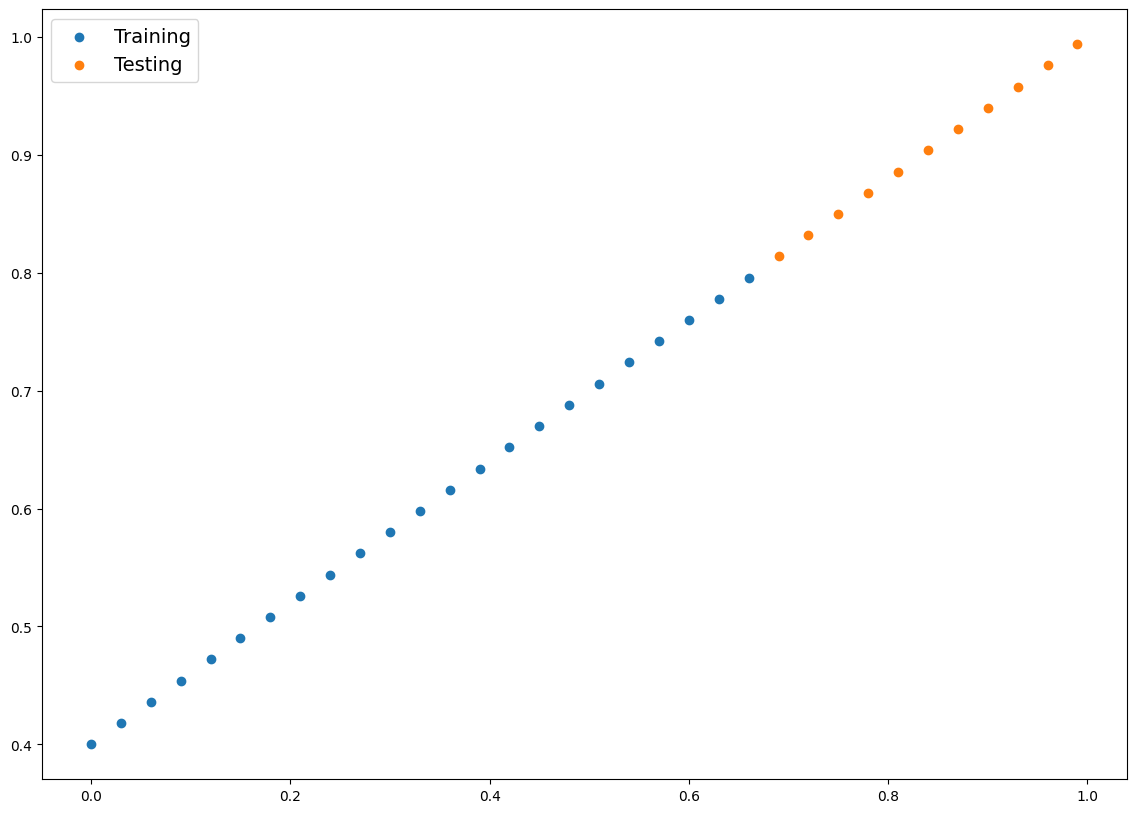

In [29]:
plot_data(X_train,y_train,X_test,y_test)

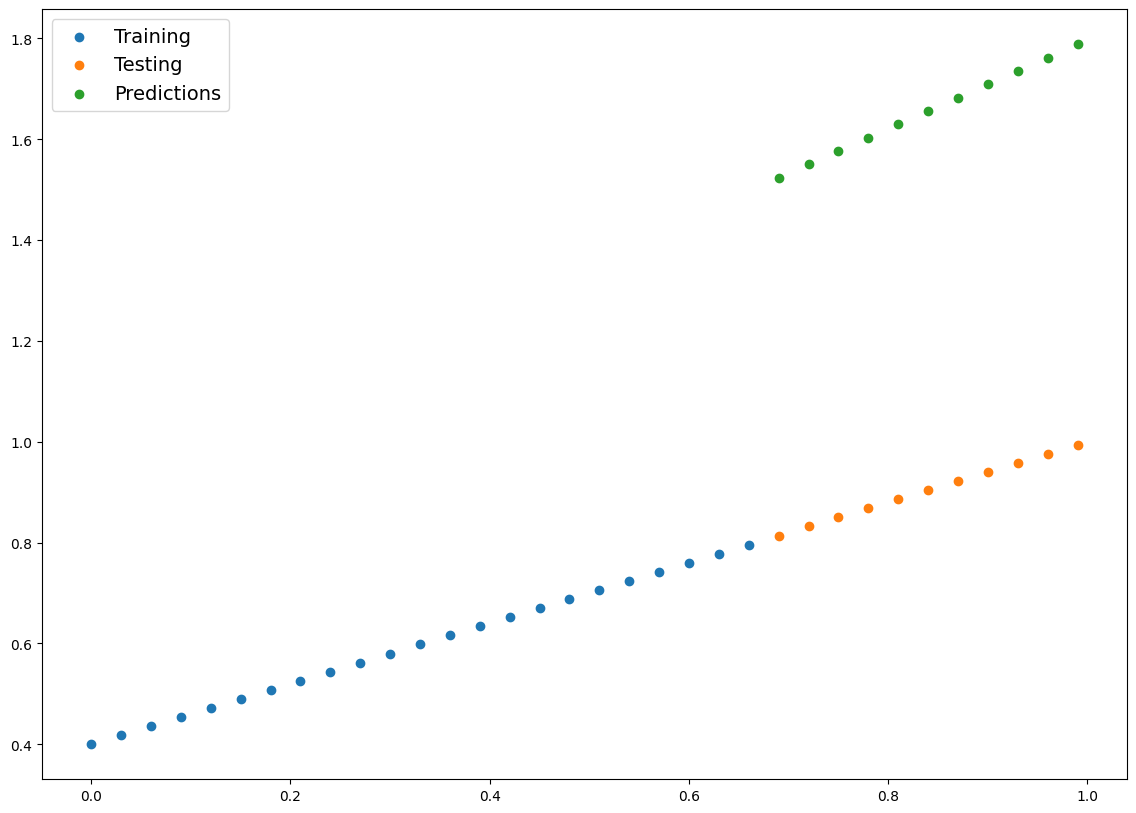

In [35]:
# Initial Testing Code
with torch.inference_mode():
  y_pred = lr(X_test)
  plot_data(X_train,y_train,X_test,y_test,y_pred)

In [70]:
# loss function and optimizer
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(lr.parameters(),lr=0.01)

In [71]:
# Fitting into Model
epochs = 200
epoch_count = []
train_loss = []
test_loss = []

for epoch in range(epochs):
  lr.train()
  # forward pass
  y_pred = lr(X_train)

  # calculate loss function
  loss_train = loss_fn(y_pred,y_train) #train loss

  # optimizer zero grad
  optimizer.zero_grad()

  # loss backward
  loss_train.backward()

  # optimizer step
  optimizer.step()

  lr.eval()

  # testing loop
  with torch.inference_mode():
    test_pred = lr(X_test)
    loss_test = loss_fn(test_pred,y_test)

  if epoch%10 == 0:
    epoch_count.append(epoch)
    train_loss.append(loss_train)
    test_loss.append(loss_test)


In [51]:
# torch.stack(train_loss).detach().numpy()

array([0.59706384, 0.4861738 , 0.37528396, 0.264394  , 0.15350404,
       0.0426141 , 0.01537883, 0.01269886, 0.0100305 , 0.00736214],
      dtype=float32)

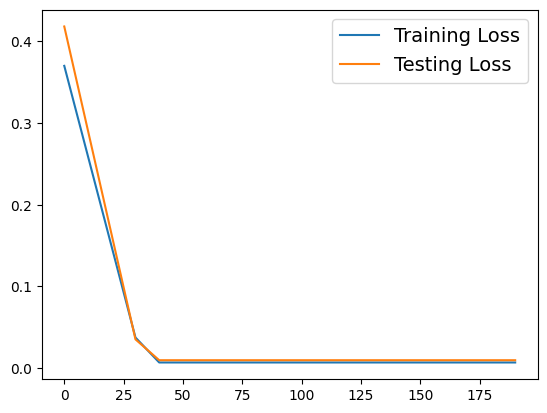

In [72]:
#Plot loss functions
plt.plot(epoch_count,np.array(torch.stack(train_loss).detach().numpy()),label="Training Loss")
plt.plot(epoch_count,torch.stack(test_loss).detach().numpy(),label="Testing Loss")
plt.legend(prop={"size":14})
plt.show()

In [73]:
weight,bias

(0.6, 0.4)

In [74]:
lr.state_dict()

OrderedDict([('weight', tensor([0.6074])), ('bias', tensor([0.3907]))])

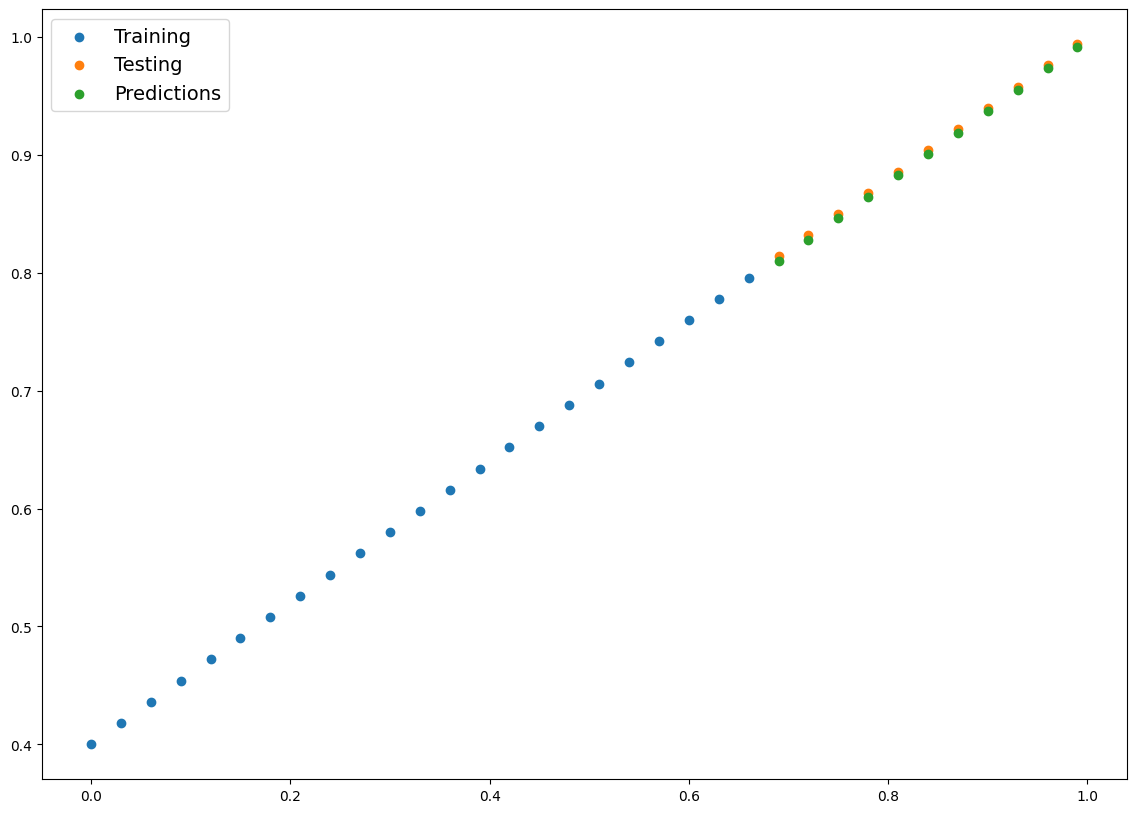

In [75]:
# Testing out from new parameters
with torch.inference_mode():
  test_pred = lr(X_test)
  plot_data(X_train,y_train,X_test,y_test,test_pred)